In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from time import time
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
latent_space = pd.read_csv("../../../data/results/visualizations/logs-1555117696-autorec11/latent.csv")

In [3]:
latent_space.head()

movieId         0         1         2         3         4         5  \
0    81276 -2.238812  3.040829 -1.477715  3.114844 -3.446436 -1.331263   
1    81383 -2.012424  2.581509 -1.502444  2.647644 -2.811108 -1.524151   
2    81385 -2.260573  3.091018 -1.360097  3.132614 -3.468033 -1.253811   
3    81417 -0.864309  1.022412 -1.163250  1.008414 -1.036445 -1.280272   
4    81456 -2.151868  2.711267 -1.856853  2.517727 -2.739356 -2.062542   

          6         7         8         9        10        11        12  \
0 -0.997579  1.784104  1.887837  2.134789  3.142583 -3.284504  3.631232   
1 -1.133679  1.637144  1.770313  1.938002  2.463945 -2.752220  2.801874   
2 -0.862748  1.849770  1.812954  2.153655  3.188785 -3.321646  3.700017   
3 -0.834358  0.822753  1.034945  0.780789  0.732742 -0.977878  0.968327   
4 -1.481408  1.788225  2.017149  2.110180  2.537725 -2.687976  2.908790   

         13        14        15        x_1        x_2  
0 -1.158172 -2.784474  3.339606   0.164639 -32.600384  
1 -1.363704 -2.333178  2.588728 -23.204828   0.433918  
2 -1.168024 -2.754669  3.445529   7.137908 -40.775803  
3 -1.064387 -1.040560  0.698980  14.616769  27.649767  
4 -1.911522 -2.447656  2.498960 -10.778888  23.909040

In [4]:
latent_space.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 19 columns):
movieId    944 non-null int64
0          944 non-null float64
1          944 non-null float64
2          944 non-null float64
3          944 non-null float64
4          944 non-null float64
5          944 non-null float64
6          944 non-null float64
7          944 non-null float64
8          944 non-null float64
9          944 non-null float64
10         944 non-null float64
11         944 non-null float64
12         944 non-null float64
13         944 non-null float64
14         944 non-null float64
15         944 non-null float64
x_1        944 non-null float64
x_2        944 non-null float64
dtypes: float64(18), int64(1)
memory usage: 140.2 KB


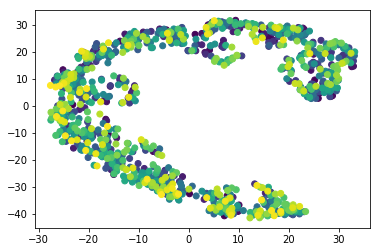

In [5]:
plt.scatter(latent_space["x_1"],latent_space["x_2"],c=latent_space.index)

In [6]:
df = pd.read_csv('../../../data/datasets/ML20/movies.csv',sep=',', usecols=['movieId','title','genres'], index_col="movieId")

In [7]:
df.head()

title  \
movieId                                       
1                          Toy Story (1995)   
2                            Jumanji (1995)   
3                   Grumpier Old Men (1995)   
4                  Waiting to Exhale (1995)   
5        Father of the Bride Part II (1995)   

                                              genres  
movieId                                               
1        Adventure|Animation|Children|Comedy|Fantasy  
2                         Adventure|Children|Fantasy  
3                                     Comedy|Romance  
4                               Comedy|Drama|Romance  
5                                             Comedy

In [8]:
df_onehot = df.drop(["genres"],axis=1).join(df['genres'].str.get_dummies())

In [9]:
df_visual = latent_space.join(df_onehot)

In [10]:
df_visual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 40 columns):
movieId               944 non-null int64
0                     944 non-null float64
1                     944 non-null float64
2                     944 non-null float64
3                     944 non-null float64
4                     944 non-null float64
5                     944 non-null float64
6                     944 non-null float64
7                     944 non-null float64
8                     944 non-null float64
9                     944 non-null float64
10                    944 non-null float64
11                    944 non-null float64
12                    944 non-null float64
13                    944 non-null float64
14                    944 non-null float64
15                    944 non-null float64
x_1                   944 non-null float64
x_2                   944 non-null float64
title                 927 non-null object
(no genres listed)    927 non-null flo

In [11]:
df_visual["title"].unique()

array([nan, 'Toy Story (1995)', 'Jumanji (1995)',
       'Grumpier Old Men (1995)', 'Waiting to Exhale (1995)',
       'Father of the Bride Part II (1995)', 'Heat (1995)',
       'Sabrina (1995)', 'Tom and Huck (1995)', 'Sudden Death (1995)',
       'GoldenEye (1995)', 'American President, The (1995)',
       'Dracula: Dead and Loving It (1995)', 'Balto (1995)',
       'Nixon (1995)', 'Cutthroat Island (1995)', 'Casino (1995)',
       'Sense and Sensibility (1995)', 'Four Rooms (1995)',
       'Ace Ventura: When Nature Calls (1995)', 'Money Train (1995)',
       'Get Shorty (1995)', 'Copycat (1995)', 'Assassins (1995)',
       'Powder (1995)', 'Leaving Las Vegas (1995)', 'Othello (1995)',
       'Now and Then (1995)', 'Persuasion (1995)',
       'City of Lost Children, The (Cité des enfants perdus, La) (1995)',
       'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
       'Dangerous Minds (1995)',
       'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)',
       'Wings of Courage (199

In [12]:
df_visual["title"].str.contains("Three Colors").value_counts()

False    924
True       3
Name: title, dtype: int64

In [13]:
df_visual["Three Colors"] = df_visual["title"].str.contains("Three Colors")

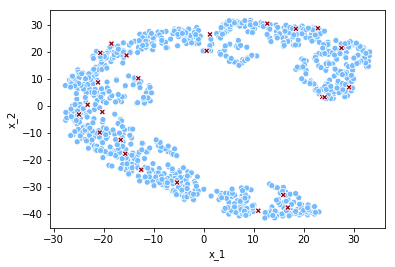

In [14]:
genre = "Animation"
colors = ["sky blue"]
tmp = df_visual[df_visual[genre] == 0]
sns.scatterplot(tmp["x_1"],tmp["x_2"],hue=tmp[genre],style=tmp[genre], palette=sns.xkcd_palette(colors), legend=None)
colors = ["crimson"]
tmp = df_visual[df_visual[genre] == 1]
sns_plot = sns.scatterplot(tmp["x_1"],tmp["x_2"],hue=tmp[genre],style=tmp[genre], markers=["X"], palette=sns.xkcd_palette(colors), legend=None)


In [38]:
#sns_plot.figure.savefig("autorec-movies-animation.pdf")

In [15]:
latent_space = pd.read_csv("../../../data/results/visualizations/logs-1555159404-autorec-users2/latent.csv")

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = latent_space.drop(columns=["x_1", "x_2"])
pca_res = pca.fit(pca_data).transform(pca_data)

print(pca_res)

latent_space["pca_1"] = pca_res[:,0]
latent_space["pca_2"] = pca_res[:,1]

[[-1.03711856e+04 -3.88042456e+00]
 [-1.03691855e+04 -2.32958379e+00]
 [-1.03681856e+04  1.31066178e+01]
 ...
 [ 1.03708145e+04 -4.13298949e-01]
 [ 1.03718145e+04  1.78324700e+00]
 [ 1.03738144e+04 -2.56992107e+00]]


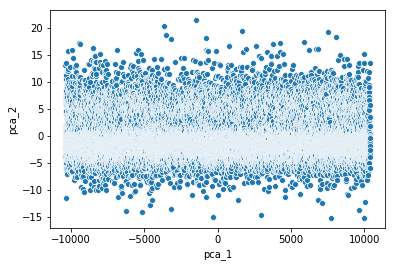

In [17]:
colors = ["sky blue", "crimson"]
sns_plot = sns.scatterplot(latent_space["pca_1"],latent_space["pca_2"], palette=sns.xkcd_palette(colors))
#sns_plot.figure.savefig("autorec-users-latent.pdf")

In [124]:
df_ratings = pd.read_csv('../ML20/ml-20m/ratings.csv',sep=',',nrows=3000000, usecols=['userId','movieId','rating'], dtype={'userId':np.int32,'movieId':np.int32,'rating':np.float32})

In [125]:
df_ratings = df_ratings[df_ratings['rating']>4]

In [126]:
data = df_ratings.pivot(index='userId', columns='movieId', values='rating')

In [127]:
data = data.fillna(0)

In [128]:
data[data != 0] = 1

In [129]:
data.head()

movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

movieId  9       10       ...    129034  129036  129344  129428  129530  \
userId                    ...                                             
1           0.0     0.0   ...       0.0     0.0     0.0     0.0     0.0   
2           0.0     0.0   ...       0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0   ...       0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0   ...       0.0     0.0     0.0     0.0     0.0   
5           0.0     0.0   ...       0.0     0.0     0.0     0.0     0.0   

movieId  129719  129788  130219  130466  130644  
userId                                           
1           0.0     0.0     0.0     0.0     0.0  
2           0.0     0.0     0.0     0.0     0.0  
3           0.0     0.0     0.0     0.0     0.0  
4           0.0     0.0     0.0     0.0     0.0  
5           0.0     0.0     0.0     0.0     0.0  

[5 rows x 11328 columns]

In [130]:
df_visual = latent_space.join(data.sum(axis = 1, skipna = True).rename("ratings"))

In [131]:
df_visual.dropna(axis=0, inplace=True)

In [74]:
palette = sns.choose_cubehelix_palette(as_cmap=True)

interactive(children=(IntSlider(value=9, description='n_colors', max=16, min=2), FloatSlider(value=0.0, descri…

In [117]:
keep_palette = palette

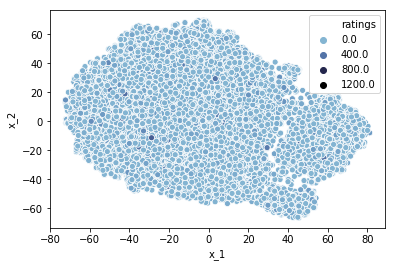

In [132]:
sns_plot = sns.scatterplot(df_visual["x_1"],df_visual["x_2"], hue=df_visual["ratings"], palette=keep_palette)
#sns_plot.figure.savefig("autorec-users-latent-ratings.pdf")